MODULE 6 CASE STUDY - II

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_main=pd.read_csv('cereal.csv')
df_main.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Q NO 1

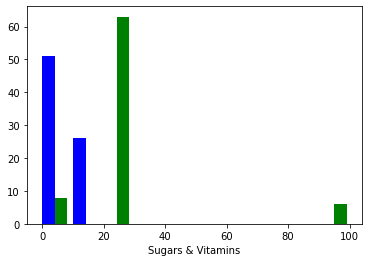

In [3]:
df1=df_main.groupby('name',as_index=True).agg({'sugars':np.sum,'vitamins':np.sum})
plt.hist([df1['sugars'],df1['vitamins']],color=['blue','g'])
plt.xlabel('Sugars & Vitamins')
plt.show()

Q NO 2

In [4]:
df_main['Manufacturer']=df_main['mfr'].replace(to_replace={'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs',
'R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'},inplace=False)

In [5]:
df_main

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufacturer
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


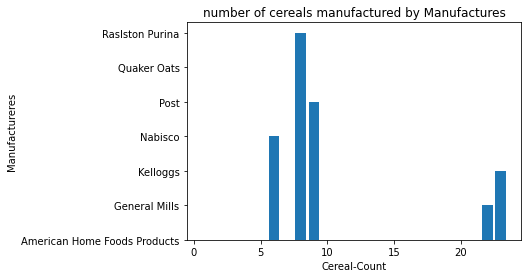

In [6]:
df2=df_main.groupby('Manufacturer',as_index=False).count()
df2
x=df2['name']
y=df2['Manufacturer']
plt.bar(x, y)
plt.ylabel("Manufactureres")
plt.xlabel("Cereal-Count")
plt.title("number of cereals manufactured by Manufactures")
plt.show()


Q NO 3

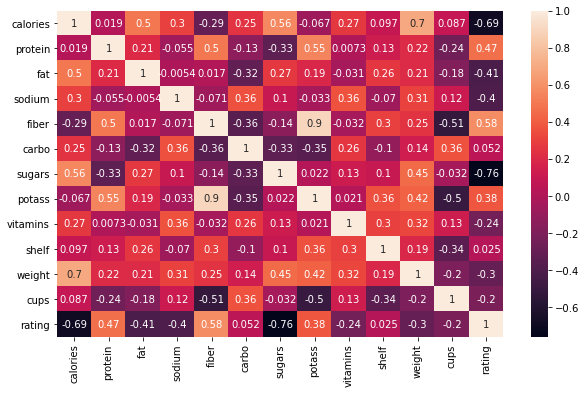

In [46]:
df=df_main
correlation=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm=LinearRegression()

In [54]:
X=df.iloc[:,3:15]
y=df['rating']

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((57, 12), (20, 12), (57,), (20,))

In [56]:
lm.fit(X_train,y_train)

LinearRegression()

coefficients thita1...thita13

In [58]:
lm.coef_

array([-2.22724168e-01,  3.27317387e+00, -1.69140801e+00, -5.44927026e-02,
        3.44347978e+00,  1.09245094e+00, -7.24895136e-01, -3.39933514e-02,
       -5.12119687e-02, -3.97670901e-08,  2.22232568e-07,  1.54803804e-07])

intecept thita0

In [59]:
lm.intercept_

54.92718415642161

prediction

In [60]:
X_test

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75
35,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00
10,120,1,2,220,0.0,12.0,12,35,25,2,1.00,0.75
0,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33
45,150,4,3,150,3.0,16.0,11,170,25,3,1.00,1.00
47,100,2,1,220,2.0,15.0,6,90,25,1,1.00,1.00
66,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75
53,100,3,0,320,1.0,20.0,3,45,100,3,1.00,1.00
50,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00
28,120,3,0,240,5.0,14.0,12,190,25,3,1.33,0.67


In [62]:
y_pred=lm.predict(X_test)
y_pred

array([34.38484317, 21.87129219, 18.04285075, 68.40297279, 34.13976431,
       40.10596494, 31.23005447, 41.50353999, 59.6428367 , 41.01549179,
       59.36399354, 49.78744502, 22.3965129 , 19.8235726 , 39.25919734,
       53.37100715, 53.31381283, 29.50954066, 45.81171578, 36.17619617])

mean Squared error 
and r2 score

In [63]:
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
mean_squared_error(y_test,y_pred)

9.1075618823869e-14

In [67]:
r2_score(y_test,y_pred)

0.9999999999999996

END 